# PG#6 가우시안 혼합 모델

In [93]:
#실습전 설정

import sys
assert sys.version_info >= (3,5)

import sklearn 
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
 
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Iris 데이터셋 중 꽃잎 길이, 너비 특성만 사용합니다. (2, 3번째 특성)

In [94]:
from sklearn.datasets import load_iris

iris=load_iris()
X = iris["data"][:,(2,3)]
y = iris.target

In [95]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c='#FFACB7')
    plt.xlabel("petal length", fontsize=14)
    plt.ylabel("petal width", fontsize=14)
    plt.title("feature scatter", fontsize=18)

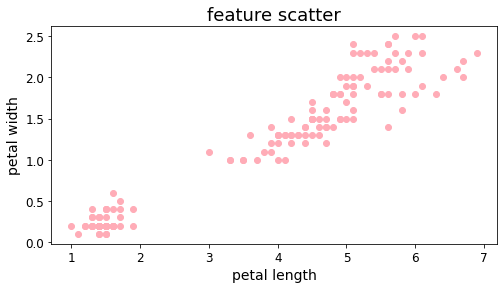

In [96]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

In [97]:
from sklearn.cluster import KMeans

### K = 3 인 경우,

In [98]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [99]:
y_pred is kmeans.labels_

True

In [100]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [101]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [102]:
def plot_data(X):
    plt.plot(X[:,0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids=centroids[weights>weights.max()/10]
    plt.scatter(centroids[:,0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:, 1],
               marker='x', s=35, linewidths=12,
               color=cross_color, zorder=11, alpha=1)

In [103]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins=X.min(axis=0)-0.1
    maxs=X.max(axis=0)+0.1
    xx,yy=np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                     np.linspace(mins[1], maxs[1], resolution))
    Z=clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

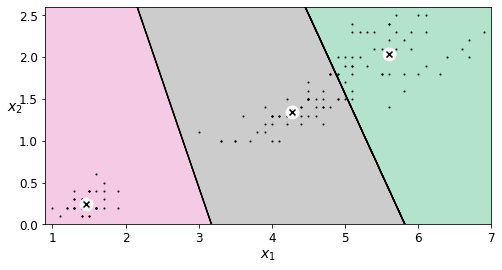

In [104]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

plt.show()

In [105]:
from sklearn.mixture import GaussianMixture

In [106]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

### 가중치

In [107]:
gm.weights_

array([0.3146746 , 0.33333288, 0.35199252])

### 평균

In [108]:
gm.means_

array([[5.57721357, 2.04303224],
       [1.4619995 , 0.24599977],
       [4.30594388, 1.34787855]])

### 분산

In [109]:
gm.covariances_

array([[[0.30034404, 0.04402642],
        [0.04402642, 0.07200287]],

       [[0.02955684, 0.00594793],
        [0.00594793, 0.01088496]],

       [[0.24667113, 0.08489919],
        [0.08489919, 0.04585075]]])

### 시각화

In [110]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins=X.min(axis=0)-0.1
    maxs=X.max(axis=0)+0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, 
                 norm = LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(-1,2,18))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(-1,2,18),
                linewidths=1, colors='k')
    
    Z=clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
      plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
      plt.tick_params(labelleft=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Log scale: values of z <= 0 have been masked
  app.launch_new_instance()


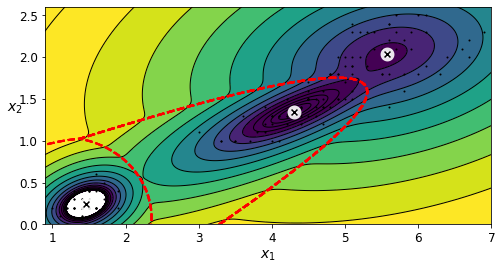

In [111]:
plt.figure(figsize=(8,4))
plot_gaussian_mixture(gm, X)
plt.show()